### Name : K.Shiva Nagendra Babu
### Email : kores@mail.sacredheart.edu
### I'd : 0903676

### MY POV Problem Statement - The task at hand is to perform exploratory analysis on a dataset related to the Titanic disaster and build binary classification models to predict survival based on various features such as age, sex, class, and ticket fare.
The goal is to create a binary classification model that accurately predicts whether a passenger on the Titanic survived or not, based on the available features. Such a model could potentially provide insights into the factors that affected survival during the disaster.



In [133]:
#imported the Important Libraries for Data exploring , Data cleaning , Data Visualization and Models
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [134]:
#reading then CSV file (Dataset)
df = pd.read_csv("Titanic.csv")

In [135]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [136]:
#First Five columns
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [137]:
# last five rows
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [138]:
# dataset rows and columns
df.shape

(891, 12)

In [139]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Data Cleaning

In [140]:
# Drop duplicate values

df=df.drop_duplicates()
df.shape
(784, 15)

(784, 15)

In [141]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [142]:
# Drop columns which are not needed for our analysis or which are duplicates (another column with values meaning the same)

df=df.drop(["Cabin", "Embarked", "Ticket",], axis=1)


In [143]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000


In [144]:
#age Description 
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [145]:
# Fill the empty values in 'age' column to the mean value of age

print('Replacing null values with mean value : ', int(df["Age"].mean()))
df["Age"] = df["Age"].fillna(int(df["Age"].mean()))
df.head(10)

Replacing null values with mean value :  29


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,8.4583
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708


In [146]:
#Drop rows with empty (null) values

df=df.dropna()

In [147]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000


### Exploring the data

In [148]:
a = ['Survived', 'Pclass', 'Sex','SibSp', 'Parch','Age']
b = ['Age', 'Fare']

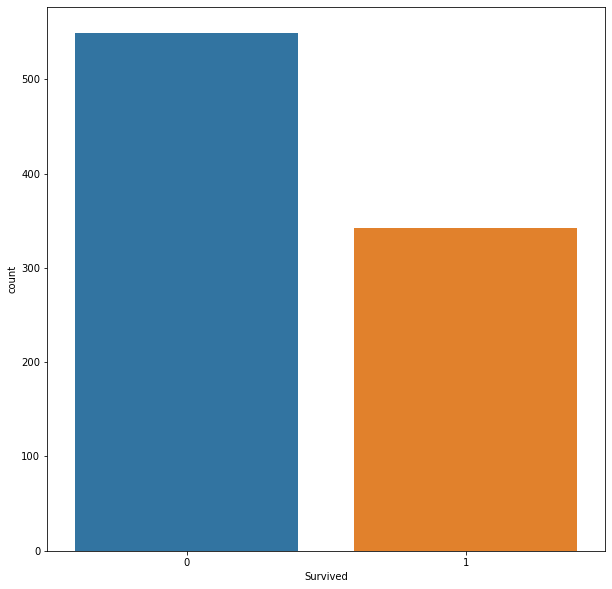

0    549
1    342
Name: Survived, dtype: int64


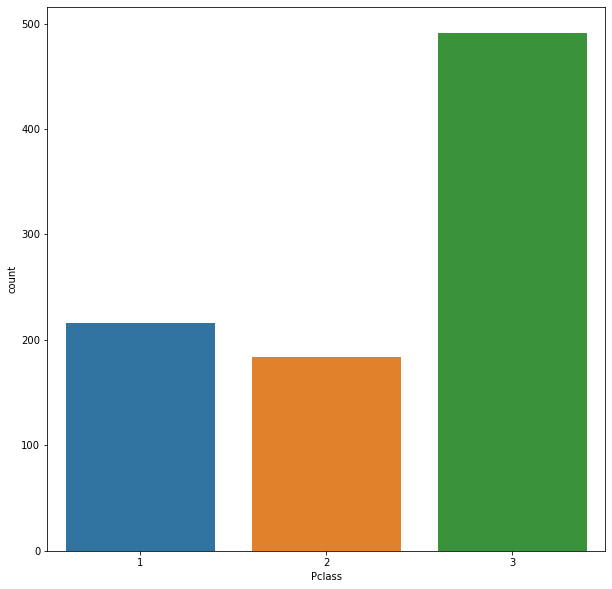

3    491
1    216
2    184
Name: Pclass, dtype: int64


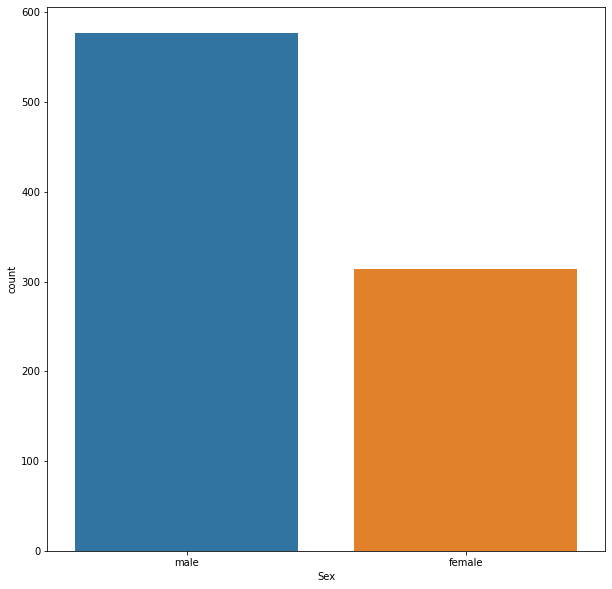

male      577
female    314
Name: Sex, dtype: int64


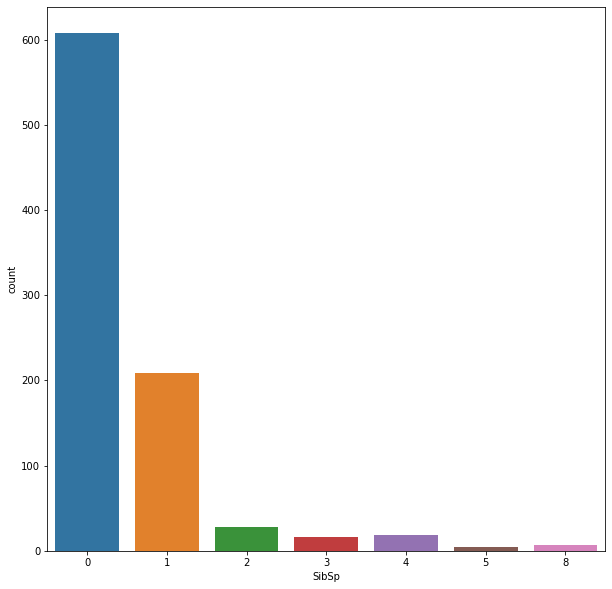

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


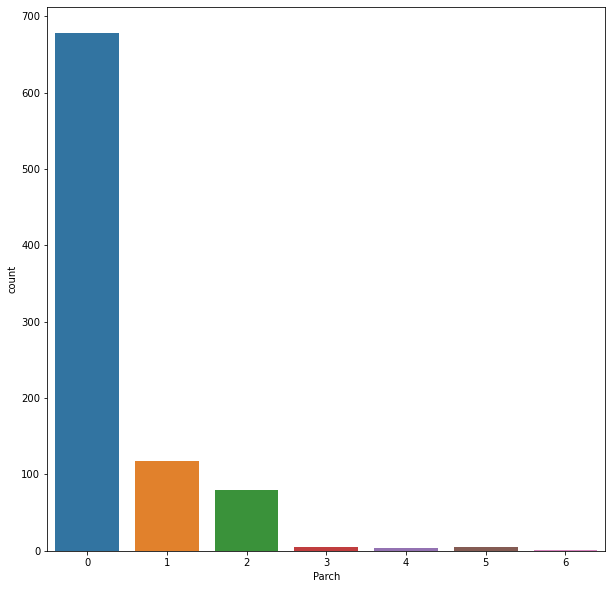

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


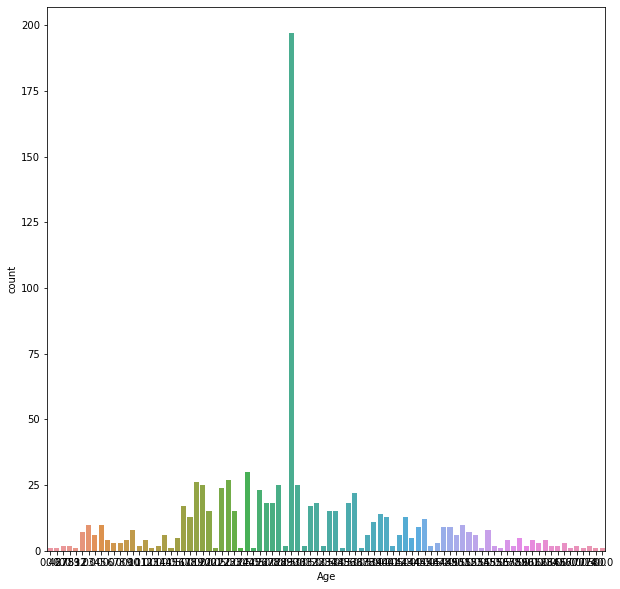

29.00    197
24.00     30
22.00     27
18.00     26
30.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 88, dtype: int64


In [149]:
for i in a:
    plt.figure(figsize=(10, 10)) # set the figure size here
    sns.countplot(x=i, data=df)
    plt.show()
    print(df[i].value_counts())


count    891.000000
mean      29.560236
std       13.005010
min        0.420000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64
0.4662676354258781


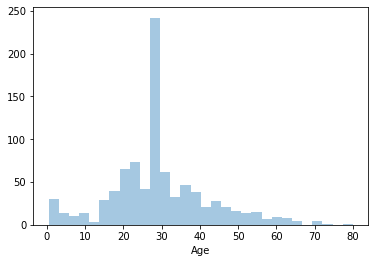

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
4.787316519674893


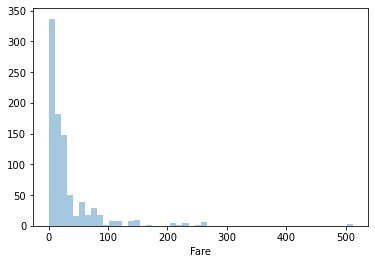

In [150]:
for i in b:
    print(df[i].describe())
    print(df[i].skew())
    sns.distplot(df[i], kde=False)
    plt.show()

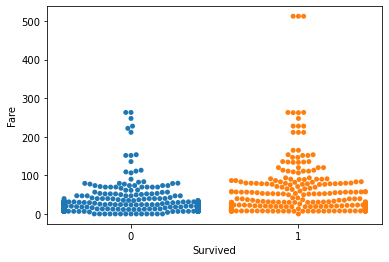

In [151]:
sns.swarmplot(x="Survived", y="Fare", data=df)
plt.show()

In [152]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


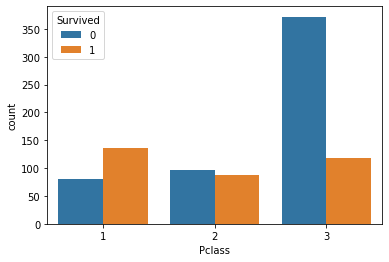

In [153]:
sns.countplot(x='Pclass',hue="Survived", data=df)
plt.show()

In [154]:
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


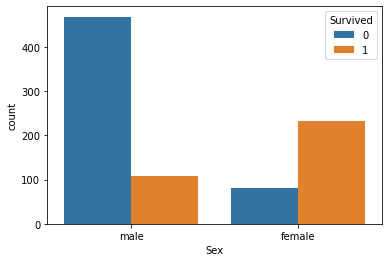

In [155]:
sns.countplot(x='Sex',hue="Survived", data=df)
plt.show()


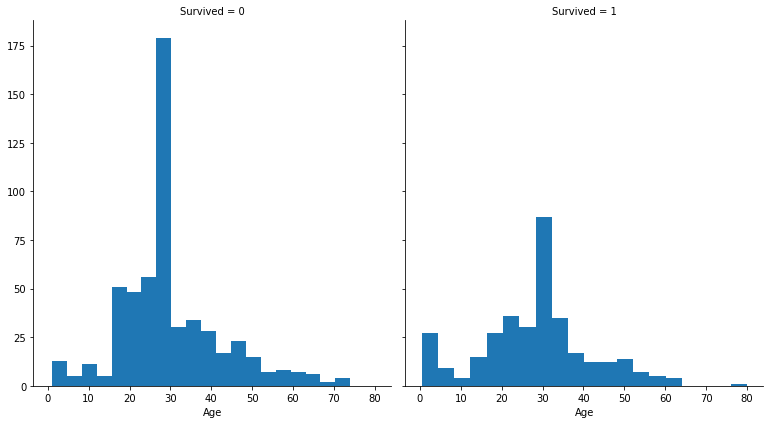

In [156]:
Age_Survived = sns.FacetGrid(df, col='Survived', height=6, aspect=0.9) # set the height and aspect ratio here
Age_Survived.map(plt.hist, 'Age', bins=20)
plt.show()


<AxesSubplot:>

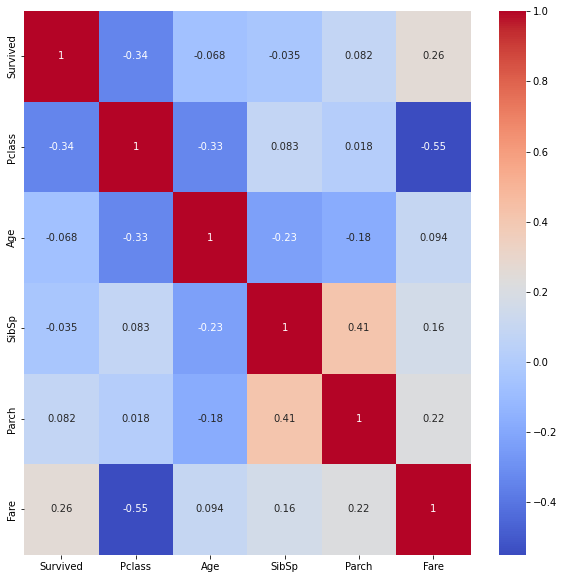

In [157]:
# correlation
fig = plt.subplots(figsize=(10,10))
sns.heatmap(df[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']].corr(), annot=True, cmap='coolwarm')


In [158]:
#zero null values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

### Model evaluation

In [159]:
from sklearn.preprocessing import LabelEncoder

# Encode the data (convert strings to numbers) so that the model can understand.
le_sex = LabelEncoder()
df["Sex"] = le_sex.fit_transform(df["Sex"].astype(str))


In [160]:
print(df.shape)
df.head(10)

(891, 9)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500
5,6,0,3,"Moran, Mr. James",1,29.0,0,0,8.4583
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,51.8625
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,21.0750
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,11.1333
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,30.0708


In [161]:
#dropping the third column
df = df.drop(df.columns[3], axis=1)

In [162]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000
887,888,1,1,0,19.0,0,0,30.0000
888,889,0,3,0,29.0,1,2,23.4500
889,890,1,1,1,26.0,0,0,30.0000


In [163]:

# Split the dependent and independent values
x = df.drop("Survived", axis=1)
y = df["Survived"]

In [164]:
# pre-processing the data
x = StandardScaler().fit(x).transform(x)


In [165]:
# Split the data for training and testing
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.8)

In [166]:
print ('Train set:', xtrain.shape,  ytrain.shape)
print ('Test set:', xtest.shape,  ytest.shape)


Train set: (712, 7) (712,)
Test set: (179, 7) (179,)


In [167]:
# Load logistic regression model from sklearn and fit the training sets
algo = LogisticRegression().fit(xtrain,ytrain)


In [168]:
# find out the predictions for the testing set
ypred = algo.predict(xtest)

# compare predicted values and actual values and find out accuracy

print("Mean Absolute Error: ", mean_absolute_error(ytest,ypred))
print("Accuracy: ", accuracy_score(ytest,ypred))

Mean Absolute Error:  0.15083798882681565
Accuracy:  0.8491620111731844


In [169]:
# Import the required libraries
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create an SVM model
model = svm.SVC(kernel='linear')

# Train the model on the training set
model.fit(x_train, y_train)

# Test the model on the testing set
y_pred = model.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print("Accuracy:", accuracy)


Accuracy: 0.7821229050279329


In [170]:
# Import the required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Decision Tree model
model = DecisionTreeClassifier()

# Train the model on the training set
model.fit(x_train, y_train)

# Test the model on the testing set
y_pred = model.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print("Accuracy:", accuracy)


Accuracy: 0.7318435754189944


In [171]:
# Import the required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
model.fit(x_train, y_train)

# Test the model on the testing set
y_pred = model.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print("Accuracy:", accuracy)


Accuracy: 0.8212290502793296


In [172]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
model.fit(x_train, y_train)

# Predict the target values
y_pred = model.predict(x_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate the R squared
r2 = r2_score(y_test, y_pred)

# Print the RMSE and R squared
print("RMSE:", rmse)
print("R squared:", r2)


RMSE: 0.3794895130340143
R squared: 0.4061392792792792
